In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
%%capture

# finds distance from index 0 to last index, moving left to right
# doesn't return to original index (full circle), stops at last index

def find_dist(coords):
    last = coords[0]
    dist = 0
    
    for i in range(1, len(coords)):
        temp_dist = np.sqrt(( np.square(( last[0] - coords[i][0] )) + np.square( last[1] - coords[i][1] )))
        dist += temp_dist
        last = coords[i]
    
    return dist

# switch two objects in the list
def mutate(coords):
    temp_coords = coords.copy()
    index_1 = random.randint(1, len(temp_coords) - 1)
    index_2 = random.randint(1, len(temp_coords) - 1)
    
    temp_coord = temp_coords[index_1]
    temp_coords[index_1] = temp_coords[index_2]
    temp_coords[index_2] = temp_coord
    
    return temp_coords

# make babies
def reproduce(coords, size):
    members = []

    for i in range(size):
        members.append(mutate(coords))
    
    return members
    
# choose best baby
def select(members):
    lowest = find_dist(members[0])
    index = 0
    
    for i in range(1, len(members) - 1):
        this_distance = find_dist(members[i])
        
        if this_distance < lowest:
            index = i
            lowest = this_distance
            
    return members[index]

In [16]:
# edit this to modify the points
coords_lst = [(0,2), (4,3), (4,1), (3,0), (2,0), (5,2), (3,4), (1,1), (2,4), (1,3)]

fittest_found = False
fittest_parent = coords_lst
last_parent = fittest_parent
latest_dist = 1000000
count = 0
while not fittest_found:
    # edit the 2nd param to change the offspring one parent produces
    members = reproduce(last_parent, 10000)
    fittest_parent = select(members)
    
    temp_dist = find_dist(fittest_parent)

    if temp_dist < latest_dist:
        count = 0
        latest_dist = temp_dist
        last_parent = fittest_parent
    
    elif temp_dist >= latest_dist:
        count += 1
        if count >= 5:
            fittest_found = True

Start Point:(0, 2)

GA's best sequence of points:[(0, 2), (1, 1), (2, 0), (3, 0), (4, 1), (5, 2), (4, 3), (3, 4), (2, 4), (1, 3)]
GA's best distance: 11.899494936611667

Original sequence of points:[(0, 2), (4, 3), (4, 1), (3, 0), (2, 0), (5, 2), (3, 4), (1, 1), (2, 4), (1, 3)]
Original distance: 23.1533400862064


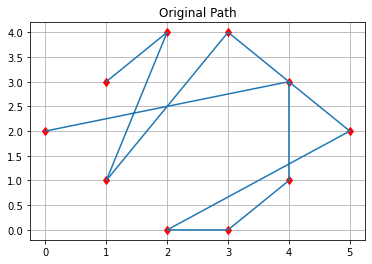

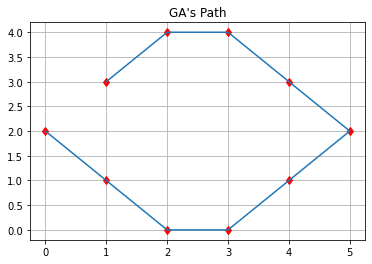

In [35]:
print("Start Point:" + str(coords_lst[0]) + "\n")

print("GA's best sequence of points:" + str(last_parent))
print("GA's best distance: " + str(find_dist(last_parent)) + "\n")

print("Original sequence of points:" + str(coords_lst))
print("Original distance: " + str(find_dist(coords_lst)))

x, y = np.array(coords_lst).T
x_path, y_path = np.array(last_parent).T

plt.title("Original Path")
plt.plot(x, y, "rd")
plt.plot(x, y)
plt.grid()
plt.show()

plt.title("GA's Path")
plt.plot(x, y, "rd")
plt.plot(x_path, y_path)
plt.grid()
plt.show()